# Notebook 1: Converting .ndf files to .h5 files



#### Load the pyecog module

The easiest place to place and run this notebook is from the directory downloaded from github, e.g. Pyecog-Master as the pyecog module will be found in this folder. However, if you want to run the notebook from else where on your computer you first need to make sure that python can find the pyecog module using sys.path.append(). To do this copy the following code into a cell and run it (shift+enter).

```python
import sys
pyecog_path = '/home/jonathan/git_repos/pyecog' # replace this with the Pyecog-Master location
sys.path.append(pyecog_path)
```

In [1]:
# import sys
# pyecog_path = '/home/jonathan/git_repos/pyecog' # replace this with the Pyecog-Master location
# sys.path.append(pyecog_path)

In [2]:
import pyecog as pg

In [7]:
import os

In [15]:
ndf_folderpath = '/media/jonathan/DATA/seizure_data/test ndf'

In [13]:
os.listdir(ndf_folderpath)

['M1518706020.ndf', 'M1518709635.ndf', 'M1518713235.ndf', 'M1518716835.ndf']

In [17]:
h5_folderpath  = '/media/jonathan/DATA/seizure_data/test_convert_h5'

# make folder for conversion if it doesnt already exist
if not os.path.exists(h5_folderpath):
    os.makedirs(h5_folderpath)

### Convert a ndf folder to h5 files

convert_ndf_directory_to_h5 arguments:
```
    - ndf_dir : path to the directory containing ndf files
    - h5_dir  : path to the directory in which to save h5 files
    - fs      : sampling rate per second - int e.g. 256,512,1024, or 'auto' (not reccomeded) 
    - tids    : Transmitter ids to convert. 'all', or list of ids e.g. [88,89,92,94] 
    - n_cores : Number of cores to use for conversion. Either int or -1 for all.  
    - glitch_detection : boolean flag, True or False. Specifies whether to apply glitch detection.
    - high_pass_filter : boolean flag, True or False. Specifies whether to apply a 1 khz high pass filter.
```

In [14]:
handler = pg.DataHandler()

In [18]:
handler.convert_ndf_directory_to_h5(ndf_dir  = ndf_folderpath,
                                    save_dir = h5_folderpath,
                                    fs       = 'auto', 
                                    tids     = 'all', 
                                    n_cores  = 4, 
                                    glitch_detection=True, 
                                    high_pass_filter=True)

4 Files for conversion. Transmitters: all
Progress: |**************************************************| 100.0% Complete


In [19]:
os.listdir(h5_folderpath)

['M1518706020_2018-02-15-14-47-00_tids_[88, 89, 90, 91, 92, 94, 104].h5',
 'M1518709635_2018-02-15-15-47-15_tids_[88, 89, 90, 91, 92, 94, 104].h5',
 'M1518713235_2018-02-15-16-47-15_tids_[88, 89, 90, 91, 92, 94, 104].h5',
 'M1518716835_2018-02-15-17-47-15_tids_[88, 89, 90, 91, 92, 94, 104].h5']

### Optional: Loading the h5 files:

At this point you can load the h5 files in the gui and manually inspect them for seizures or activity of interest. 

You can also load them in python notebooks for further analysis. Here you have two main options, either use the H5File class from pyecog, or work directly with the h5 file with the h5py module.

In [28]:
h5_filepaths = [os.path.join(h5_folderpath,f) for f in os.listdir(h5_folderpath)]
h5_filepaths[0]

'/media/jonathan/DATA/seizure_data/test_convert_h5/M1518706020_2018-02-15-14-47-00_tids_[88, 89, 90, 91, 92, 94, 104].h5'

In [29]:
h5_file = pg.H5File(h5_filepaths[0])

In [33]:
h5_file.attributes

{'Mcode': 'M1518706020',
 'fs_dict': '{104: 256, 88: 256, 89: 256, 90: 256, 91: 256, 92: 256, 94: 256}',
 'num_channels': 7,
 't_ids': array([ 88,  89,  90,  91,  92,  94, 104])}

h5 file objects can be indexed by their transmitter id number, this will return a dictionary for that transmitter.

In [34]:
h5_file[88]

{'data': array([ -2.88472652,  -2.48887563,  -2.08903646, ..., -26.77547836,
        -48.63244247, -36.26065445], dtype=float32),
 'feature_col_names': None,
 'features': None,
 'features_df': None,
 'fs': 256,
 'h5dataset': None,
 'scale_coef_for_feature_extraction': None,
 'time': array([  0.00000000e+00,   3.90625424e-03,   7.81250848e-03, ...,
          3.59999219e+03,   3.59999609e+03,   3.60000000e+03])}

In [39]:
y = h5_file[88]['data']
x = h5_file[88]['time']
x.shape

(921600,)

Text(0.5,0,'seconds')

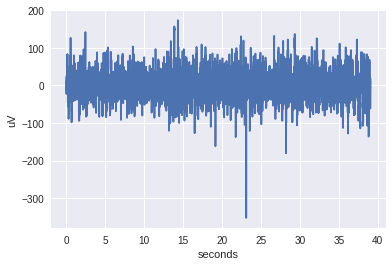

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.plot(x[:10000], y[:10000])
plt.ylabel('uV')
plt.xlabel('seconds')

### Extra: understanding how the ndf files are converted

- to code up

In [ ]:
ndf_file = pg.NdfFile(ndf_filepath, verbose = True, fs = 'auto')
ndf_file.load(read_ids='all',
              auto_glitch_removal=True,
              auto_resampling=True,
              auto_filter=True)